In [33]:
import csv
import numpy as np
import matplotlib.pyplot as plt

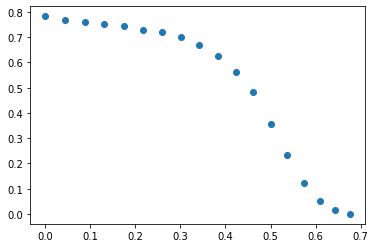

In [34]:
with open('acrylic.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    header = next(reader)
    long_angles, tran_angles, longs, trans = [], [], [], []
    for row in reader:
        angle, long, tran = row
        if long:
            longs.append(float(long))
            long_angles.append(float(angle))
        if tran:
            trans.append(float(tran))
            tran_angles.append(float(angle))

long_angles, tran_angles, longs, trans = np.array(long_angles), np.array(tran_angles), np.array(longs), np.array(trans)

plt.scatter(np.sin(long_angles/180*np.pi), longs)

In [35]:



A = np.array([[

0.0